In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
dialogos = []
with open("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/allines/alllines.txt", "r") as archivo:
    for linea in archivo:
        dialogos.append(linea.strip())
textos = pd.DataFrame(dialogos, columns=["Diálogo"])

In [3]:
textos

,Diálogo
0,"""ACT I"""
1,"""SCENE I. London. The palace."""
2,"""Enter KING HENRY, LORD JOHN OF LANCASTER, the..."
3,"""So shaken as we are, so wan with care,"""
4,"""Find we a time for frighted peace to pant,"""
...,...
111391,"""Lead us from hence, where we may leisurely"""
111392,"""Each one demand an answer to his part"""
111393,"""Perform'd in this wide gap of time since first"""
111394,"""We were dissever'd: hastily lead away."""


In [4]:
textos[textos['Diálogo'].str.contains('ACT')].value_counts() 

Diálogo  
"ACT I"      36
"ACT II"     36
"ACT III"    36
"ACT IV"     36
"ACT V"      36
Name: count, dtype: int64

In [5]:
textos[textos['Diálogo'].str.contains('SCENE')].value_counts()

Diálogo                                               
"SCENE II. The same."                                     8
"SCENE IV. Another part of the field."                    6
"SCENE III. The same."                                    6
"SCENE V. Another part of the field."                     6
"SCENE I. London. The palace."                            5
                                                         ..
"SCENE II. GLOUCESTER'S house."                           1
"SCENE II. Hall in Capulet's house."                      1
"SCENE II. Imogen's bedchamber in Cymbeline's palace:"    1
"SCENE II. KING JOHN'S palace."                           1
"SCENE XV. The same. A monument."                         1
Name: count, Length: 619, dtype: int64

___

# 1) ¿Cuáles son las palabras más frecuentes en los diálogos, con más de 8 caracteres de estas obras de teatro?

In [6]:
todos_dialogos = ' '.join(textos['Diálogo']).replace("'", "").replace('"', '').replace(',', '')
palabras = todos_dialogos.split()
palabras_filtradas = [palabra for palabra in palabras if len(palabra) > 8]
frecuencia_palabras = Counter(palabras_filtradas)
palabras_mas_comunes = frecuencia_palabras.most_common(10)

In [7]:
palabras_mas_comunes

[('therefore', 384),
 ('Therefore', 211),
 ('gentleman', 204),
 ('ANTIPHOLUS', 189),
 ('something', 131),
 ('themselves', 113),
 ('sovereign', 113),
 ('Attendants', 108),
 ('honourable', 106),
 ('gentlemen', 106)]

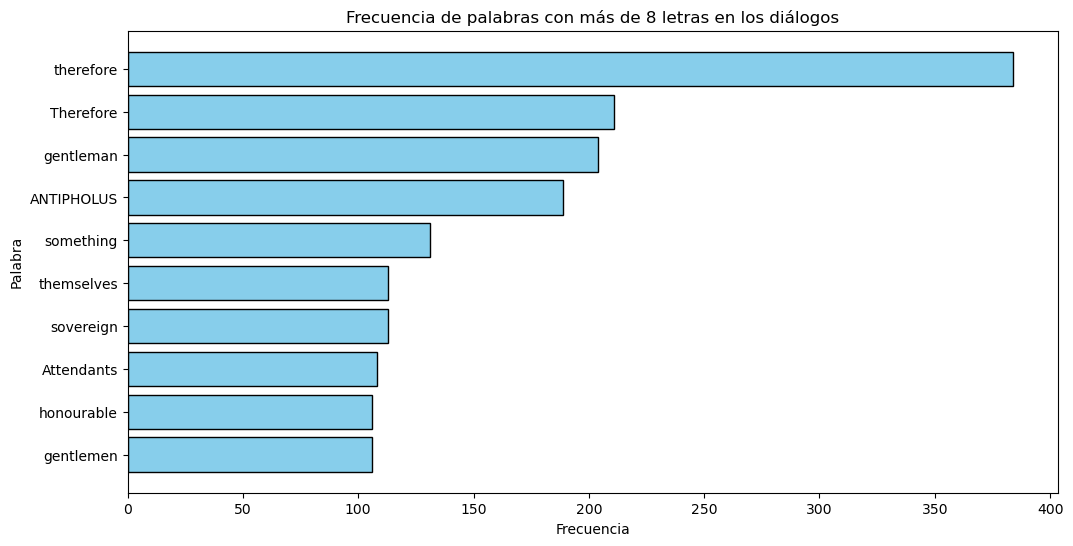

In [8]:
palabras_grafico, frecuencias_grafico = zip(*palabras_mas_comunes)

plt.figure(figsize=(12, 6))
plt.barh(palabras_grafico, frecuencias_grafico, edgecolor='black', color= "skyblue")
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Frecuencia de palabras con más de 8 letras en los diálogos')
plt.gca().invert_yaxis()
plt.show()

___

    ➢ Conclusión:

    Se pueden observar las palabras más repetidas dentro de la obra con más de 8 caracteres.

___

    ➢ Con respecto a esta pregunta, pudimos notar 1 tipo de sesgo:

    1) Sesgo de selección de datos: El sesgo podría surgir al solo analizar palabras a partir de cierta longitud de caracteres, y no el total de las palabras. Esto podría generar que se pierda información importante, como por ejemplo, palabras que no son conectores pero que son importantes para el análisis de la obra.